In [45]:
from IPython.display import HTML

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>
''')

# Problem 2.8
Mätdatat givet i uppgiften ses i tabellen

|x|y|
|--- |--- |
|0.01|10.2|
|0.05|4.92|
|0.10|3.79|
|0.20|3.13|
|0.50|2.83|
|1.00|3.00|
|2.00|3.51|
|3.00|4.04|
|5.00|4.92|
|7.00|5.67|
|10.0|6.67|
|15.0|8.00|

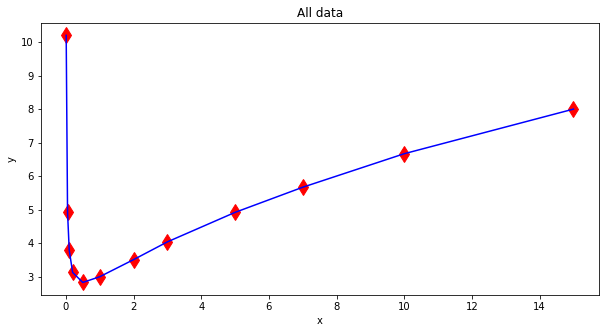

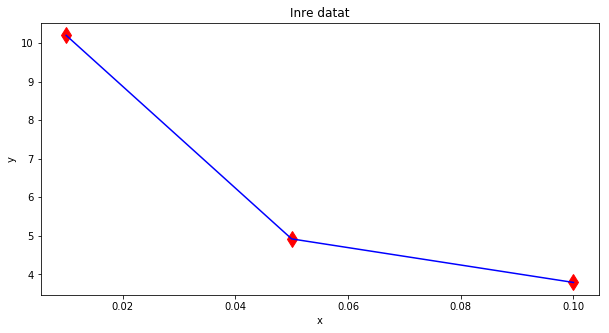

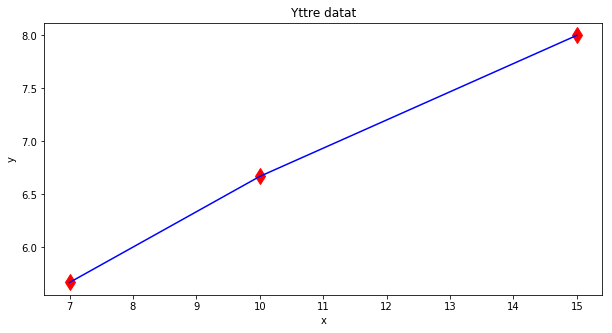

In [46]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (10,5)

x = np.array([0.01, 0.05, 0.10, 0.20, 0.50, 1.00, 2.00, 3.00, 5.00, 7.00, 10.0, 15.0])
y = np.array([10.2, 4.92, 3.79, 3.13, 2.83, 3.00, 3.51, 4.04, 4.92, 5.67, 6.67, 8.00])

plt.figure()
plt.plot(x, y, 'rd', markersize=12)
plt.plot(x, y, 'b', markersize=12)
plt.xlabel('x')
plt.ylabel('y')
plt.title('All data')

plt.figure()
plt.plot(x[:3], y[:3], 'rd', markersize=12)
plt.plot(x[:3], y[:3], 'b', markersize=12)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Inre datat')
plt.show()

plt.figure()
plt.plot(x[9:], y[9:], 'rd', markersize=12)
plt.plot(x[9:], y[9:], 'b', markersize=12)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Yttre datat')
plt.show()

Det verkar som att funktionen har olika beteende för stora och små $x$, det motiverar ansatsen

$y = ax^n + bx^m.$

Där $ax^n$ dominerar för små $x$ och $bx^m$ dominerar för stora $x$.

Om vi logartimerar datat och gör samma plottar som ovan så får vi

Inre lutning n: -0.434019354372
Inre lutning m: 0.451617798668


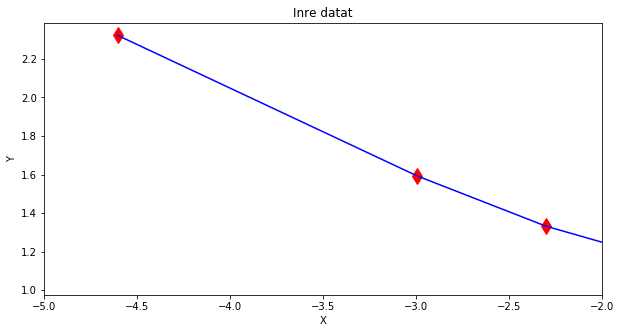

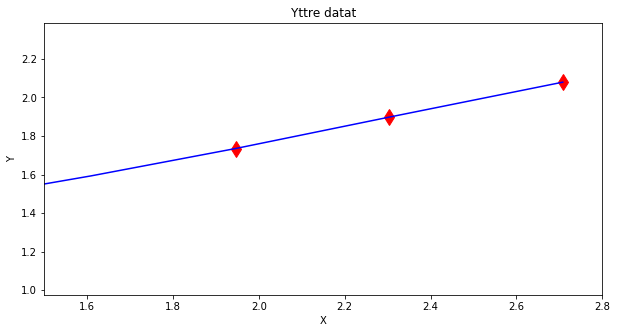

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
plt.rcParams["figure.figsize"] = (10,5)

X = np.log(np.array([0.01, 0.05, 0.10, 0.20, 0.50, 1.00, 2.00, 3.00, 5.00, 7.00, 10.0, 15.0]))
Y = np.log(np.array([10.2, 4.92, 3.79, 3.13, 2.83, 3.00, 3.51, 4.04, 4.92, 5.67, 6.67, 8.00]))

n, _, _, _, _ = stats.linregress(X[:3], Y[:3])
m, _, _, _, _ = stats.linregress(X[9:], Y[9:])

print "Inre lutning n: {}".format(n)
print "Inre lutning m: {}".format(m)

plt.figure()
plt.plot(X[:3], Y[:3], 'rd', markersize=12)
plt.plot(X, Y, 'b')
plt.xlim((-5, -2))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Inre datat')
plt.show()

plt.figure()
plt.plot(X[9:], Y[9:], 'rd', markersize=12)
plt.plot(X, Y, 'b')
plt.xlim((1.5, 2.8))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Yttre datat')
plt.show()

Från den linjära anpassningen utläser vi att
- $n=-0.43\approx -\frac{1}{2}$
- $m=0.45\approx \frac{1}{2}$

Baserad på dessa exponenterna kan vi tänka oss två ansatser, den första är 

$y = \frac{a}{\sqrt{x}}+b\sqrt{x}$

och den andra är

$y = \sqrt{\frac{a}{x}+bx}.$

Vi börjar undersöka ansatsen $y = \sqrt{\frac{a}{x}+bx}$

Vi kan skriva om uttrycket på formen 

$xy^2 = a + bx^2 = f(x^2)$ 

Vi definierar

$Y = xy^2, X = x^2$

Så att

$Y = a + bX$

Nedan syns även funktionssambandet för $y(x)$.

a: 4.27367117147
b: 6.40832110726


Text(0.5,1,'All data')

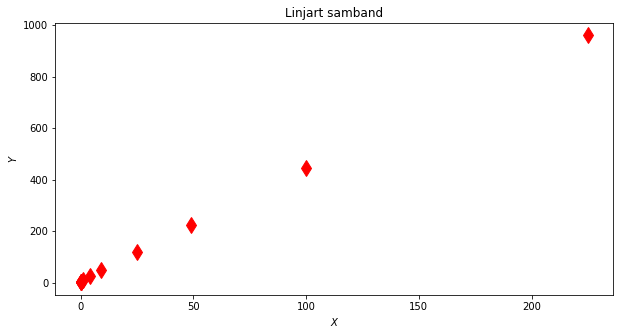

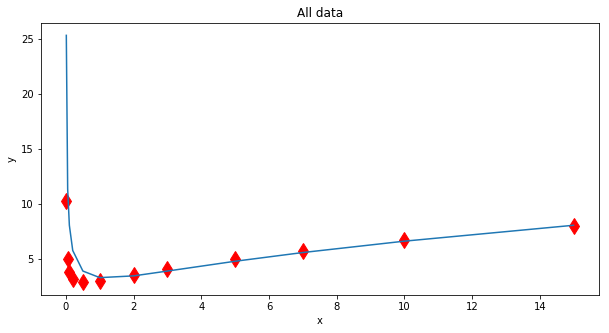

In [73]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (10,5)

x = np.array([0.01, 0.05, 0.10, 0.20, 0.50, 1.00, 2.00, 3.00, 5.00, 7.00, 10.0, 15.0])
y = np.array([10.2, 4.92, 3.79, 3.13, 2.83, 3.00, 3.51, 4.04, 4.92, 5.67, 6.67, 8.00])

Y = np.multiply(np.multiply(x, y), y)
X = np.multiply(x,x)

a, b, _, _, _ = stats.linregress(X,Y)

print "a: {}".format(a)
print "b: {}".format(b)
plt.figure()
plt.plot(X, Y, 'rd', markersize=12)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('Linjart samband')

plt.figure()
plt.plot(x, y, 'rd', markersize=12)
plt.plot(x, np.sqrt(b/x + a*x))
plt.xlabel('x')
plt.ylabel('y')
plt.title('All data')

Från plotten ovan ser vi att ansatsen inte stämmer väl för låga $x$.

Nu kollar vi ansatsen

$y(x) = \frac{a}{\sqrt(x)} + b\sqrt{x}$

Genom att multiplicera med $\sqrt{x}$ fås

$\sqrt{x}y = a + bx$

DVS 

$\sqrt{x}y = f(x)$

Vi defninierar $Y = \sqrt{x}y$

b: 2.001870915
a: 0.996498258602


Text(0.5,1,'All data')

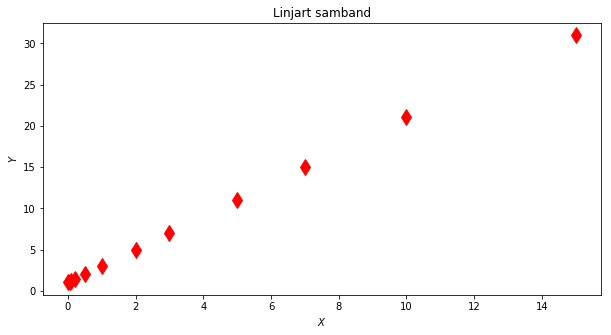

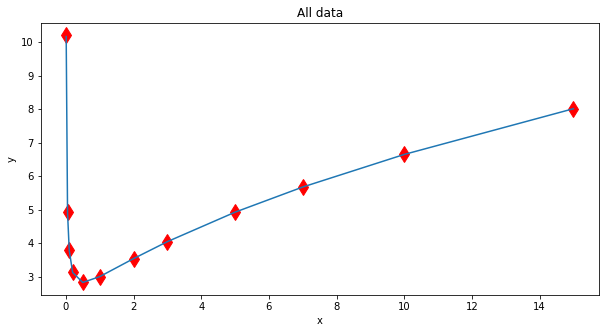

In [72]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (10,5)

x = np.array([0.01, 0.05, 0.10, 0.20, 0.50, 1.00, 2.00, 3.00, 5.00, 7.00, 10.0, 15.0])
y = np.array([10.2, 4.92, 3.79, 3.13, 2.83, 3.00, 3.51, 4.04, 4.92, 5.67, 6.67, 8.00])

Y = np.multiply(np.sqrt(x), y)

slope, intercept, _, _, _ = stats.linregress(x, Y)

print "b: {}".format(slope)
print "a: {}".format(intercept)
plt.figure()
plt.plot(x, Y, 'rd', markersize=12)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('Linjart samband')

plt.figure()
plt.plot(x, y, 'rd', markersize=12)
plt.plot(x, intercept/(np.sqrt(x))+slope*np.sqrt(x))
plt.xlabel('x')
plt.ylabel('y')
plt.title('All data')

I plotten ovan så syns det att ansatsen stämmer väl med mätdatat.
Det slutliga funktionssambandet är 

$y(x) = \frac{1}{\sqrt{x}} + 2\sqrt{x}$

In [48]:
from IPython.display import HTML

HTML('''<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter, delivered by Fastly, rendered by Rackspace.
</footer>
''')